<a href="https://colab.research.google.com/github/TrovaBruno/A3_Inteligencia_Artificial/blob/main/Trabalho_A3_Noriega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
td=pd.read_csv('UCL_AllTime_Performance_Table.csv')

In [5]:
td.columns

Index(['#;Team;M.;W;D;L;goals;Dif;Pt.'], dtype='object')

In [ ]:
print(td.dtypes)

#;Team;M.;W;D;L;goals;Dif;Pt.    object
dtype: object


In [ ]:
td.head()

,#;Team;M.;W;D;L;goals;Dif;Pt.
0,1;Real Madrid;486;291;85;110;1076:55:00;533;533
1,2;Bayern Munich;388;231;78;79;817:24:00;427;427
2,3;FC Barcelona;341;196;77;68;675:51:00;319;319
3,4;Manchester United;289;153;69;67;524:56:00;22...
4,5;Juventus;297;151;68;78;472:57:00;171;171


In [ ]:
td.columns[0]

'#;Team;M.;W;D;L;goals;Dif;Pt.'

In [6]:
td = pd.read_csv('UCL_AllTime_Performance_Table.csv', sep=';')

In [7]:
td.columns[0]

'#'

In [ ]:
td.head()

,#,Team,M.,W,D,L,goals,Dif,Pt.
0,1.0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,2.0,Bayern Munich,388,231,78,79,817:24:00,427,427
2,3.0,FC Barcelona,341,196,77,68,675:51:00,319,319
3,4.0,Manchester United,289,153,69,67,524:56:00,224,224
4,5.0,Juventus,297,151,68,78,472:57:00,171,171


In [8]:
td.drop(['#'],axis=1,inplace=True)

In [ ]:
td.columns

Index(['Team', 'M.', 'W', 'D', 'L', 'goals', 'Dif', 'Pt.'], dtype='object')

In [ ]:
print(td.dtypes)

Team     object
M.        int64
W         int64
D         int64
L         int64
goals    object
Dif       int64
Pt.       int64
dtype: object


In [9]:
# Dividir a string apenas no primeiro ":"
td[['goals_marcados', 'goals_sofridos']] = td['goals'].str.split(':', n=1, expand=True)

# Remover tudo após o segundo ":" na coluna 'goals_sofridos'
td['goals_sofridos'] = td['goals_sofridos'].str.split(':').str[0]

In [10]:
td.head()

,Team,M.,W,D,L,goals,Dif,Pt.,goals_marcados,goals_sofridos
0,Real Madrid,486,291,85,110,1076:55:00,533,533,1076,55
1,Bayern Munich,388,231,78,79,817:24:00,427,427,817,24
2,FC Barcelona,341,196,77,68,675:51:00,319,319,675,51
3,Manchester United,289,153,69,67,524:56:00,224,224,524,56
4,Juventus,297,151,68,78,472:57:00,171,171,472,57


In [11]:
td.columns

Index(['Team', 'M.', 'W', 'D', 'L', 'goals', 'Dif', 'Pt.', 'goals_marcados',
       'goals_sofridos'],
      dtype='object')

In [12]:
td.drop(['goals','Dif'],axis=1,inplace=True)

In [13]:
td.columns

Index(['Team', 'M.', 'W', 'D', 'L', 'Pt.', 'goals_marcados', 'goals_sofridos'], dtype='object')

In [14]:
td.isnull().sum()

,0
Team,0
M.,0
W,0
D,0
L,0
Pt.,0
goals_marcados,0
goals_sofridos,0


In [15]:
td['goals_marcados'] = pd.to_numeric(td['goals_marcados'], errors='coerce')
td['goals_sofridos'] = pd.to_numeric(td['goals_sofridos'], errors='coerce')
grouped = td.groupby('Team')[['goals_marcados', 'goals_sofridos']].mean()

In [16]:
print(grouped)

                        goals_marcados  goals_sofridos
Team                                                  
1. FC Frankfurt (Oder)            23.0            32.0
1. FC Kaiserslautern              18.0            16.0
1. FC Köln                        27.0            19.0
1. FC Magdeburg                   15.0            11.0
1. FC Nürnberg                    16.0            14.0
...                                ...             ...
Újpest FC                         66.0             3.0
İstanbul Başakşehir                7.0            18.0
ŁKS Łódź                           2.0             6.0
Śląsk Wrocław                      2.0             5.0
Željezničar Sarajevo               1.0             4.0

[354 rows x 2 columns]


In [ ]:
# Definir para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supondo que 'td' é o seu DataFrame
grouped = td.groupby('Team')[['goals_marcados', 'goals_sofridos']].mean()

print(grouped)


                                goals_marcados  goals_sofridos
Team                                                          
1. FC Frankfurt (Oder)                    23.0            32.0
1. FC Kaiserslautern                      18.0            16.0
1. FC Köln                                27.0            19.0
1. FC Magdeburg                           15.0            11.0
1. FC Nürnberg                            16.0            14.0
1. FC Saarbrücken                          5.0             7.0
1. FC Union Berlin                         6.0            10.0
1899 Hoffenheim                           11.0            14.0
AB Gladsaxe                                4.0             5.0
AC Milan                                 431.0            16.0
AC Sparta Praha                          130.0            32.0
ACF Fiorentina                            53.0            45.0
AE Lárissa                                 3.0             3.0
AEK Athen                                 58.0         

In [ ]:
# Supondo que 'td' é o seu DataFrame
td['avg_goals_marcados'] = td['goals_marcados'] / td['M.']
td['avg_goals_sofridos'] = td['goals_sofridos'] / td['M.']

# Agrupando por time e calculando as médias
grouped = td.groupby('Team')[['avg_goals_marcados', 'avg_goals_sofridos']].mean()

print(grouped)


                                avg_goals_marcados  avg_goals_sofridos
Team                                                                  
1. FC Frankfurt (Oder)                    1.095238            1.523810
1. FC Kaiserslautern                      1.500000            1.333333
1. FC Köln                                1.588235            1.117647
1. FC Magdeburg                           1.875000            1.375000
1. FC Nürnberg                            2.000000            1.750000
1. FC Saarbrücken                         2.500000            3.500000
1. FC Union Berlin                        1.000000            1.666667
1899 Hoffenheim                           1.833333            2.333333
AB Gladsaxe                               1.000000            1.250000
AC Milan                                  1.626415            0.060377
AC Sparta Praha                           1.274510            0.313725
ACF Fiorentina                            1.358974            1.153846
AE Lár

In [ ]:
real_madrid_stats = td[td['Team'] == 'Real Madrid']
print(real_madrid_stats)

          Team   M.    W   D    L  Pt.  goals_marcados  goals_sofridos  \
0  Real Madrid  486  291  85  110  533            1076              55   

   avg_goals_marcados  avg_goals_sofridos  
0            2.213992            0.113169  


In [ ]:
grande_quantidade_goals = grouped[grouped['avg_goals_marcados'] > 2]
print(grande_quantidade_goals)

                   avg_goals_marcados  avg_goals_sofridos
Team                                                     
1. FC Saarbrücken            2.500000            3.500000
AFC DWS                      2.166667            0.666667
B 1913 Odense                3.750000            3.500000
Bayern Munich                2.105670            0.061856
Budapesti Vasas              2.296296            1.259259
Dundee FC                    2.500000            1.750000
FC Ararat                    2.333333            0.833333
FC Sion                      2.250000            2.000000
Ipswich Town                 4.000000            1.250000
Lokomotiv Sofia              2.375000            2.625000
MTK Budapest                 2.600000            2.200000
Manchester City              2.118110            0.188976
OGC Nice                     2.071429            1.785714
Real Madrid                  2.213992            0.113169
Stade Reims                  2.625000            1.250000
TSV 1860 Münch

In [ ]:
# Agrupar por time e calcular as médias
grouped = td.groupby('Team').mean()

# Filtrar times com média de gols marcados > 2 e jogos > 100
filtered_teams = grouped[(grouped['avg_goals_marcados'] > 2) & (grouped['M.'] > 100)]

print(filtered_teams)


                    M.      W     D      L    Pt.  goals_marcados  \
Team                                                                
Bayern Munich    388.0  231.0  78.0   79.0  427.0           817.0   
Manchester City  127.0   72.0  26.0   29.0  123.0           269.0   
Real Madrid      486.0  291.0  85.0  110.0  533.0          1076.0   

                 goals_sofridos  avg_goals_marcados  avg_goals_sofridos  
Team                                                                     
Bayern Munich              24.0            2.105670            0.061856  
Manchester City            24.0            2.118110            0.188976  
Real Madrid                55.0            2.213992            0.113169  


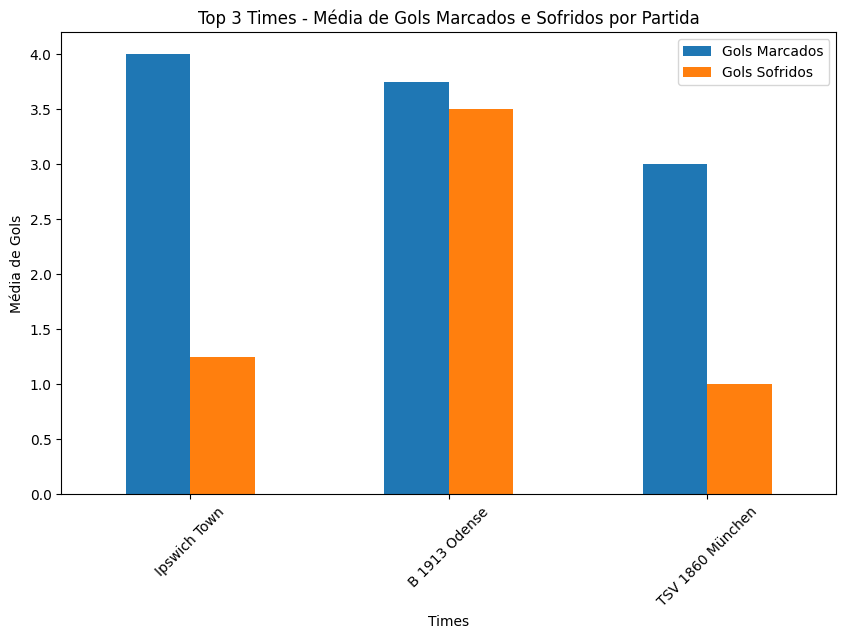

In [ ]:
# Ordenar os times pela média de gols marcados e selecionar os top 3
top_3_teams = grouped.nlargest(3, 'avg_goals_marcados')

# Criar o gráfico de barras
top_3_teams[['avg_goals_marcados', 'avg_goals_sofridos']].plot(kind='bar', figsize=(10, 6))

plt.title('Top 3 Times - Média de Gols Marcados e Sofridos por Partida')
plt.xlabel('Times')
plt.ylabel('Média de Gols')
plt.xticks(rotation=45)
plt.legend(['Gols Marcados', 'Gols Sofridos'])
plt.show()


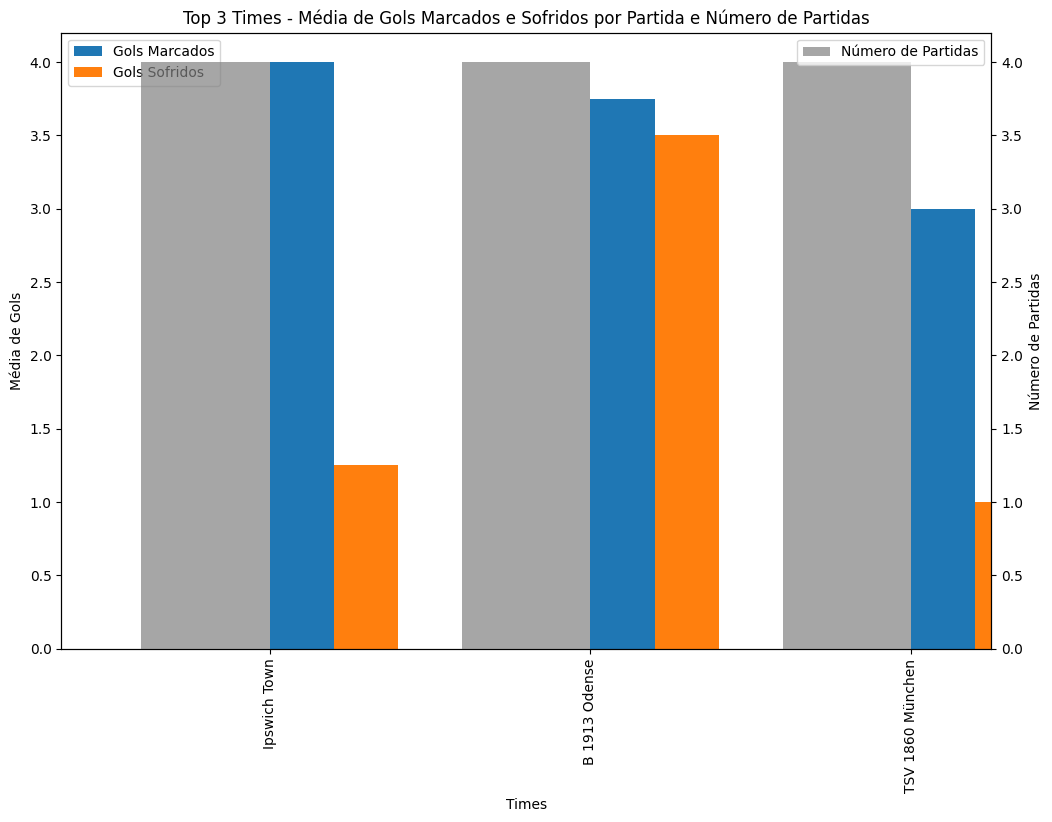

In [ ]:
# Ordenar os times pela média de gols marcados e selecionar os top 3
top_3_teams = grouped.nlargest(3, 'avg_goals_marcados')

# Criar o gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 8))

# Criando barras para gols marcados e sofridos
top_3_teams[['avg_goals_marcados', 'avg_goals_sofridos']].plot(kind='bar', ax=ax1, position=0, width=0.4)

# Criando um segundo eixo y para o número de partidas
ax2 = ax1.twinx()
top_3_teams['M.'].plot(kind='bar', ax=ax2, position=1, width=0.4, color='grey', alpha=0.7)

# Configurações do gráfico
ax1.set_xlabel('Times')
ax1.set_ylabel('Média de Gols')
ax2.set_ylabel('Número de Partidas')
ax1.set_title('Top 3 Times - Média de Gols Marcados e Sofridos por Partida e Número de Partidas')
ax1.legend(['Gols Marcados', 'Gols Sofridos'], loc='upper left')
ax2.legend(['Número de Partidas'], loc='upper right')

plt.xticks(rotation=45)
plt.show()


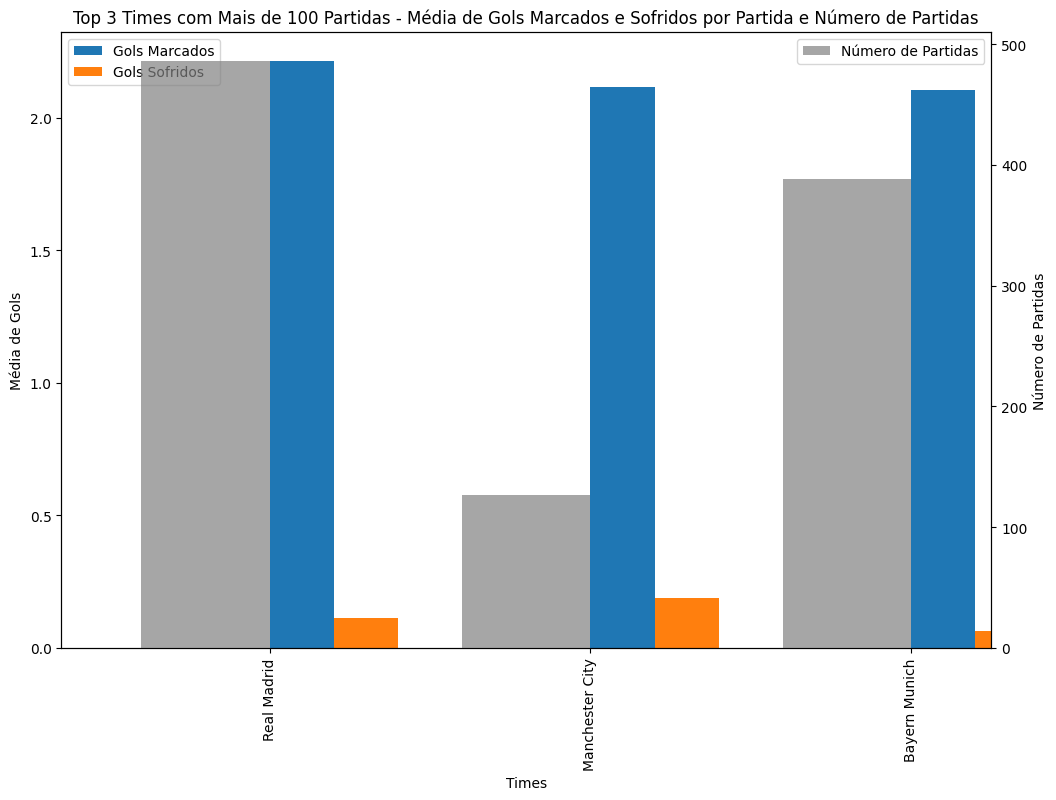

In [ ]:
# Filtrar times com mais de 100 partidas
filtered_teams = grouped[grouped['M.'] > 100]

# Ordenar os times pela média de gols marcados e selecionar os top 3
top_3_teams = filtered_teams.nlargest(3, 'avg_goals_marcados')

# Criar o gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 8))

# Criando barras para gols marcados e sofridos
top_3_teams[['avg_goals_marcados', 'avg_goals_sofridos']].plot(kind='bar', ax=ax1, position=0, width=0.4)

# Criando um segundo eixo y para o número de partidas
ax2 = ax1.twinx()
top_3_teams['M.'].plot(kind='bar', ax=ax2, position=1, width=0.4, color='grey', alpha=0.7)

# Configurações do gráfico
ax1.set_xlabel('Times')
ax1.set_ylabel('Média de Gols')
ax2.set_ylabel('Número de Partidas')
ax1.set_title('Top 3 Times com Mais de 100 Partidas - Média de Gols Marcados e Sofridos por Partida e Número de Partidas')
ax1.legend(['Gols Marcados', 'Gols Sofridos'], loc='upper left')
ax2.legend(['Número de Partidas'], loc='upper right')

plt.xticks(rotation=45)
plt.show()


In [17]:
td.head()

,Team,M.,W,D,L,Pt.,goals_marcados,goals_sofridos
0,Real Madrid,486,291,85,110,533,1076,55
1,Bayern Munich,388,231,78,79,427,817,24
2,FC Barcelona,341,196,77,68,319,675,51
3,Manchester United,289,153,69,67,224,524,56
4,Juventus,297,151,68,78,171,472,57


                      M.         W         D         L       Pt.  \
M.              1.000000  0.974861  0.981159  0.933849  0.719490   
W               0.974861  1.000000  0.943131  0.836572  0.850304   
D               0.981159  0.943131  1.000000  0.911338  0.683847   
L               0.933849  0.836572  0.911338  1.000000  0.437281   
Pt.             0.719490  0.850304  0.683847  0.437281  1.000000   
goals_marcados  0.977105  0.996166  0.941415  0.851668  0.837563   
goals_sofridos  0.415687  0.364866  0.401083  0.461052  0.135444   

                goals_marcados  goals_sofridos  
M.                    0.977105        0.415687  
W                     0.996166        0.364866  
D                     0.941415        0.401083  
L                     0.851668        0.461052  
Pt.                   0.837563        0.135444  
goals_marcados        1.000000        0.376511  
goals_sofridos        0.376511        1.000000  


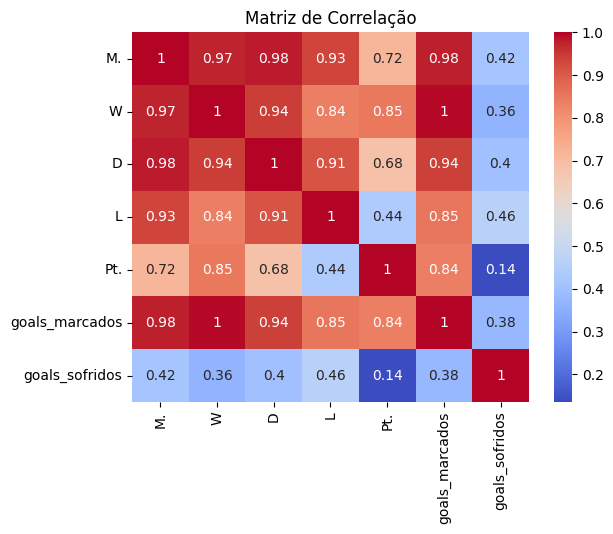

In [19]:
# Selecionar apenas colunas numéricas para o cálculo da correlação
numerical_cols = td.select_dtypes(include=np.number).columns
correlation_matrix = td[numerical_cols].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Visualizar a matriz de correlação usando um heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


Interpretação:
M (Partidas Jogadas): Forte correlação com vitórias (W), empates (D), derrotas (L) e gols marcados. Menor correlação com pontos (Pt) e gols sofridos (goals_sofridos).

W (Vitórias): Altíssima correlação com partidas jogadas (M), e gols marcados. Correlação moderada com derrotas (L) e pontos (Pt).

D (Empates): Alta correlação com partidas jogadas (M), vitórias (W), e derrotas (L). Correlação mais fraca com pontos (Pt).

L (Derrotas): Forte correlação com partidas jogadas (M), vitórias (W) e empates (D). Correlação fraca com pontos (Pt) e gols sofridos.

Pt (Pontos): Moderada correlação com vitórias (W) e gols marcados (goals_marcados). Correlação baixa com derrotas (L) e gols sofridos (goals_sofridos).

goals_marcados (Gols Marcados): Altíssima correlação com vitórias (W), partidas jogadas (M) e moderada com pontos (Pt). Menor correlação com gols sofridos (goals_sofridos).

goals_sofridos (Gols Sofridos): Correlação mais baixa com todas as outras variáveis, especialmente pontos (Pt).

In [21]:
  # Filtrar times com mais de 100 partidas
filtered_teams = td[td['M.'] > 100]

# Ordenar pelo menor número de gols sofridos e selecionar os top 3
top_3_defensive_teams = filtered_teams.nsmallest(3, 'goals_sofridos')

print(top_3_defensive_teams)

           Team   M.    W   D   L  Pt.  goals_marcados  goals_sofridos
7      FC Porto  265  120  58  87   86             392               1
9    Chelsea FC  197  101  52  44  153             337               1
22  Valencia CF  116   48  34  34   44             169               3


In [29]:
# Variáveis independentes (input features)
X = td[['M.', 'W', 'D', 'L', 'goals_marcados', 'goals_sofridos']]

# Variável dependente (target output)
y = td['Pt.']




In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 33.38403826092209
R^2 Score: 0.983693251655994


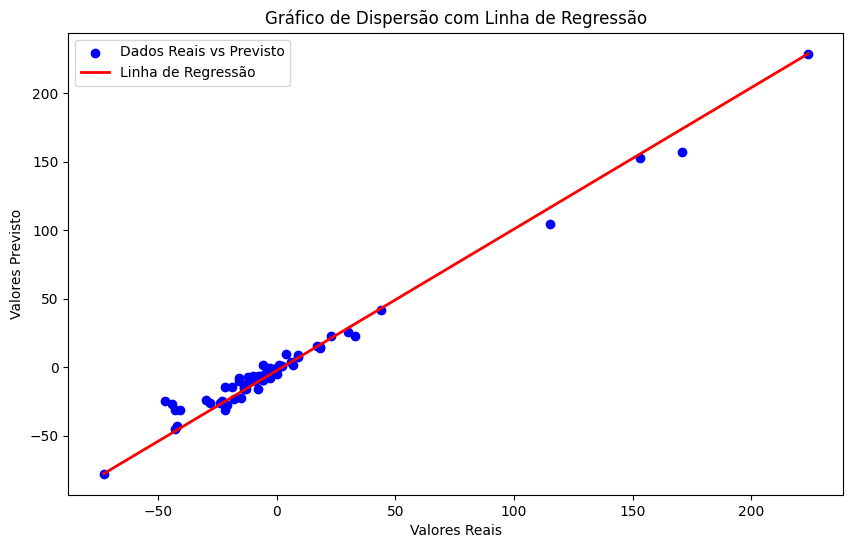

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar gráfico de dispersão dos dados de teste e as previsões do modelo
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Dados Reais vs Previsto')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', lw=2, label='Linha de Regressão')
plt.title('Gráfico de Dispersão com Linha de Regressão')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previsto')
plt.legend()
plt.show()
